<a href="https://colab.research.google.com/github/Subhranshu-123/BIKE2/blob/main/Copy_of_practice_sessoin_(polynomial_regression)_1(subhranshu_sekhar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
import scipy
from sklearn.datasets import fetch_california_housing
df=fetch_california_housing()
df=pd.DataFrame(df.data,columns=df.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
df.mean()

,0
MedInc,3.870671
HouseAge,28.639486
AveRooms,5.429000
AveBedrms,1.096675
Population,1425.476744
AveOccup,3.070655
Latitude,35.631861
Longitude,-119.569704


In [ ]:
df.median()

,0
MedInc,3.534800
HouseAge,29.000000
AveRooms,5.229129
AveBedrms,1.048780
Population,1166.000000
AveOccup,2.818116
Latitude,34.260000
Longitude,-118.490000


In [ ]:
df.std()

,0
MedInc,1.899822
HouseAge,12.585558
AveRooms,2.474173
AveBedrms,0.473911
Population,1132.462122
AveOccup,10.386050
Latitude,2.135952
Longitude,2.003532


In [ ]:
df.var()

,0
MedInc,3.609323e+00
HouseAge,1.583963e+02
AveRooms,6.121533e+00
AveBedrms,2.245915e-01
Population,1.282470e+06
AveOccup,1.078700e+02
Latitude,4.562293e+00
Longitude,4.014139e+00


In [ ]:
#GRADIENT DESCENT
x=df.drop('MedInc',axis=1)
y=df['MedInc'].values.reshape(-1,1)
y

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [ ]:
x=df.drop('MedInc',axis=1)
y=df['MedInc'].values
y

array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886])

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.98214266,  0.62855945, -0.15375759, ..., -0.04959654,
         1.05254828, -1.32783522],
       [-0.60701891,  0.32704136, -0.26333577, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.85618152,  1.15562047, -0.04901636, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-0.92485123, -0.09031802,  0.04941393, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-0.84539315, -0.04021111,  0.15877763, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-1.00430931, -0.07044252,  0.1384028 , ..., -0.04368215,
         1.75014627, -0.83369581]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=np.c_[np.ones((x.shape[0],1)),x]
x

array([[ 1.        ,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 1.        , -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.        ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [ 1.        , -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [ 1.        , -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [ 1.        , -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [ ]:
alpha=0.00001
epochs=10000
theta=np.random.randn(x.shape[1])
theta

array([ 1.1406806 , -1.97867508,  1.44283299, -1.50392723,  0.22692531,
       -1.30502859,  0.01539696,  1.03980346])

In [ ]:
def gradient_descend(x,y,theta,epochs):
  m=len(y)
  errors=[]
  for i in range(epochs):
    predictions=x.dot(theta)
    error=predictions-y
    errors.append(np.mean(np.abs(error)))
    gradient=x.T.dot(error)
    theta=theta-0.01*gradient
  return theta,errors

In [ ]:
def gradient_descend(x,y,theta,epochs):
  m=len(y)
  errors=[]
  for i in range(epochs):
    predictions=x.dot(theta)
    error=(1/m)*np.sum(predictions-y)**2
    errors.append(error)
    gradient=2/m*x.T.dot(x.dot(theta)-y) # Corrected gradient calculation
    theta=theta-alpha*gradient
  return theta,errors

In [ ]:
x = df.drop('MedInc', axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = np.c_[np.ones((x.shape[0], 1)), x]
predictions = x.dot(theta.reshape(-1,1))
print("actual Vs predicted")
print(np.c_[y[:5].reshape(-1,1),predictions[:5].reshape(-1,1)])

actual Vs predicted
[[ 2.55555556  0.2139126 ]
 [ 2.10984183  2.71370452]
 [ 2.80225989 -0.59046451]
 [ 2.54794521 -2.03981938]
 [ 2.18146718 -1.74954412]]


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE :',mean_squared_error(y,predictions))
print('R2: ', r2_score(y,predictions))
print('RMSE :',r2_score(y,predictions))

MSE : 137.7554609887522
R2:  -0.27711229195581266
RMSE : -0.27711229195581266


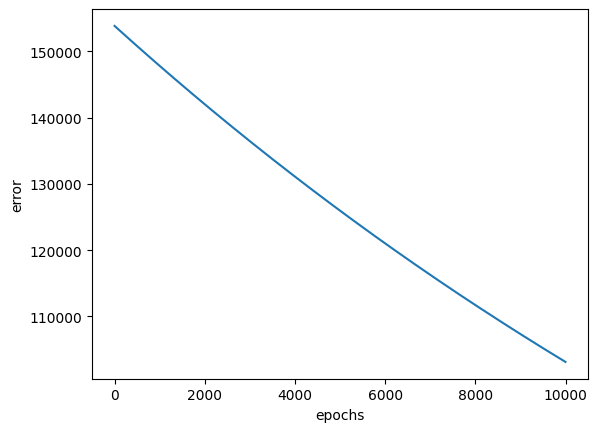

In [ ]:
from matplotlib import pyplot as pyplot
plt.plot(errors)
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

In [ ]:
theta, errors = gradient_descend(x,y,theta,epochs)
theta
errors

[np.float64(153826.77446646176),
 np.float64(153820.6214570138),
 np.float64(153814.46869368377),
 np.float64(153808.31617646184),
 np.float64(153802.16390533806),
 np.float64(153796.0118803027),
 np.float64(153789.86010134593),
 np.float64(153783.7085684578),
 np.float64(153777.5572816285),
 np.float64(153771.4062408483),
 np.float64(153765.2554461072),
 np.float64(153759.10489739547),
 np.float64(153752.9545947032),
 np.float64(153746.80453802057),
 np.float64(153740.65472733777),
 np.float64(153734.5051626449),
 np.float64(153728.35584393222),
 np.float64(153722.2067711898),
 np.float64(153716.05794440783),
 np.float64(153709.9093635765),
 np.float64(153703.7610286859),
 np.float64(153697.6129397263),
 np.float64(153691.4650966877),
 np.float64(153685.31749956045),
 np.float64(153679.1701483346),
 np.float64(153673.02304300034),
 np.float64(153666.87618354784),
 np.float64(153660.7295699672),
 np.float64(153654.58320224873),
 np.float64(153648.43708038246),
 np.float64(153642.291204

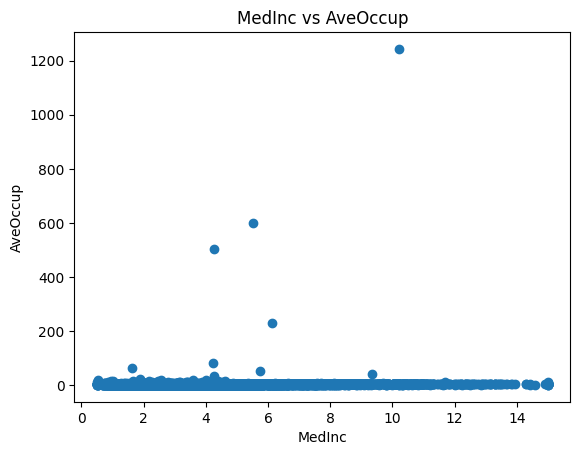

In [ ]:
plt.scatter(df['MedInc'],df['AveOccup'])
plt.xlabel('MedInc')
plt.ylabel('AveOccup')
plt.title('MedInc vs AveOccup')
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature
x=df['MedInc'].values.reshape(-1,1)
y=df['AveOccup'].values
x=add_dummy_feature(x)
x

array([[1.    , 8.3252],
       [1.    , 8.3014],
       [1.    , 7.2574],
       ...,
       [1.    , 1.7   ],
       [1.    , 1.8672],
       [1.    , 2.3886]])

In [ ]:
def normal_equation(x,y):
  return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
  theta=normal_equation(x,y)
  theta

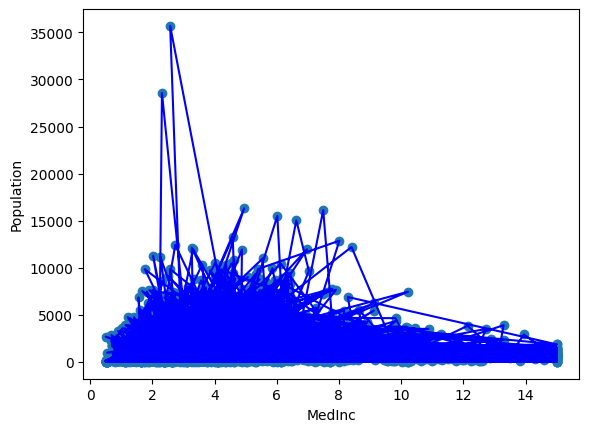

In [ ]:
plt.scatter(df['MedInc'], df['Population'])
plt.xlabel('MedInc')
plt.ylabel('Population')
plt.plot(df['MedInc'],df['Population'],color='blue')
plt.show()

In [ ]:
errors

[np.float64(153826.77446646176),
 np.float64(153820.6214570138),
 np.float64(153814.46869368377),
 np.float64(153808.31617646184),
 np.float64(153802.16390533806),
 np.float64(153796.0118803027),
 np.float64(153789.86010134593),
 np.float64(153783.7085684578),
 np.float64(153777.5572816285),
 np.float64(153771.4062408483),
 np.float64(153765.2554461072),
 np.float64(153759.10489739547),
 np.float64(153752.9545947032),
 np.float64(153746.80453802057),
 np.float64(153740.65472733777),
 np.float64(153734.5051626449),
 np.float64(153728.35584393222),
 np.float64(153722.2067711898),
 np.float64(153716.05794440783),
 np.float64(153709.9093635765),
 np.float64(153703.7610286859),
 np.float64(153697.6129397263),
 np.float64(153691.4650966877),
 np.float64(153685.31749956045),
 np.float64(153679.1701483346),
 np.float64(153673.02304300034),
 np.float64(153666.87618354784),
 np.float64(153660.7295699672),
 np.float64(153654.58320224873),
 np.float64(153648.43708038246),
 np.float64(153642.291204

<Axes: >

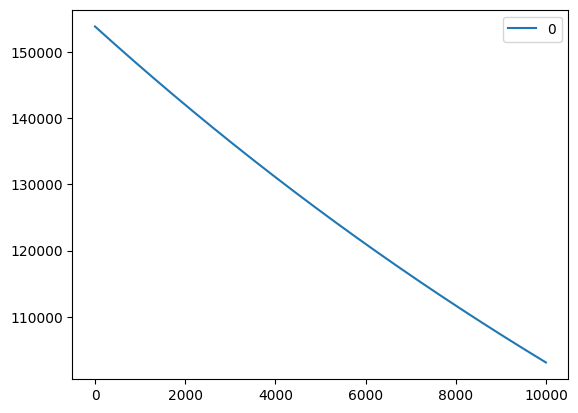

In [ ]:
pd.DataFrame(errors).plot()

In [ ]:
pd.DataFrame({'Actual' : y,'prdiction':predictions})

,Actual,prdiction
0,2.555556,-1.185393
1,2.109842,2.166455
2,2.802260,-2.313433
3,2.547945,-3.713906
4,2.181467,-3.421027
...,...,...
20635,2.560606,0.559359
20636,3.122807,1.473209
20637,2.325635,1.946670
20638,2.123209,1.617502


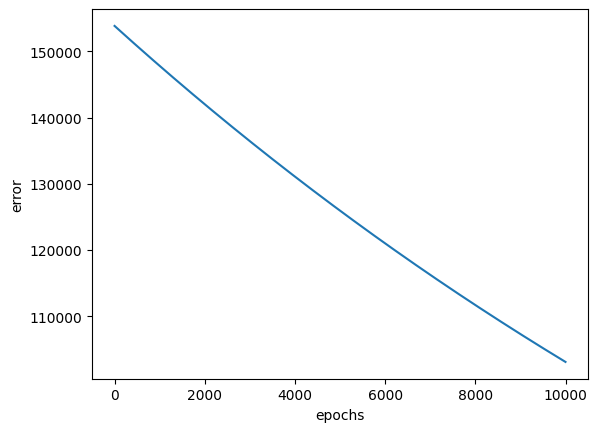

In [ ]:
plt.plot(errors)
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

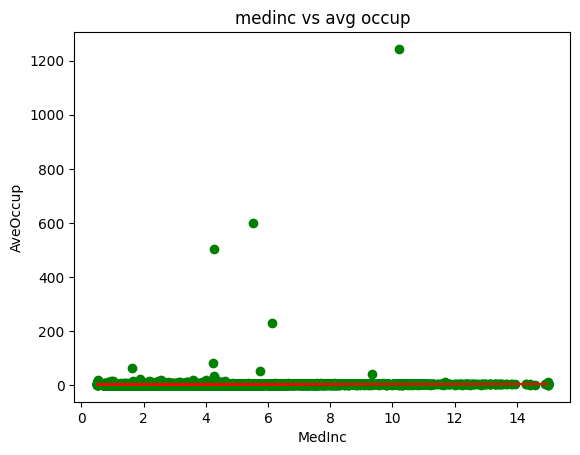

In [ ]:
x=df['MedInc'].values.reshape(-1,1)
y=df['AveOccup'].values.reshape(-1,1)
x=add_dummy_feature(x)

from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x,y)
plt.scatter(x[:,1],y,color='green')
plt.xlabel('MedInc')
plt.ylabel('AveOccup')
plt.plot(x[:,1],linear_model.predict(x),color='red')
plt.title('medinc vs avg occup')
plt.show()

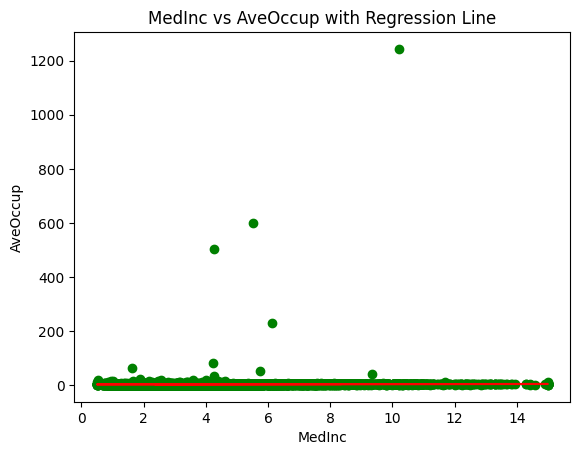

In [ ]:
x=df['MedInc'].values.reshape(-1,1)
y=df['AveOccup'].values.reshape(-1,1)
x=add_dummy_feature(x)

from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x,y)
plt.scatter(x[:,1],y,color='green')
plt.xlabel('MedInc')
plt.ylabel('AveOccup')
plt.plot(x[:,1],linear_model.predict(x),color='red')
plt.title('MedInc vs AveOccup with Regression Line')
plt.show()

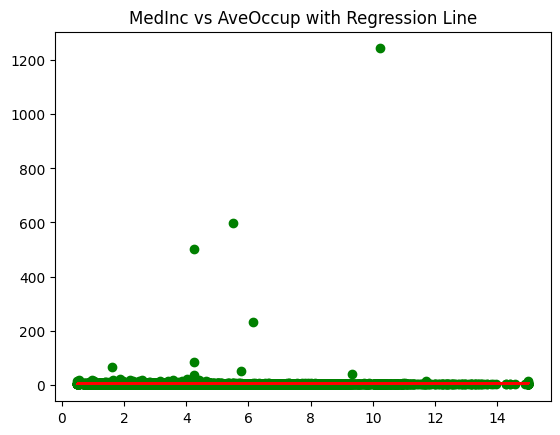

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)
linear_model=LinearRegression()
linear_model.fit(x_poly,y)
plt.scatter(x[:,1],y,color='green')
plt.title('MedInc vs AveOccup with Regression Line')
plt.plot(x[:,1],linear_model.predict(x_poly),color='red')
plt.show()

In [ ]:
print('intercept :',linear_model.intercept_)
print('coefficient :',linear_model.coef_)
print('equation :',linear_model.intercept_,'+',linear_model.coef_[0][1],'*x','+',linear_model.coef_[0][2],'*x^2')

intercept : [3.16408385]
coefficient : [[ 0.00000000e+00 -2.60208521e-17 -6.22392964e-02  0.00000000e+00
  -6.22392964e-02  2.08908580e-02]]
equation : [3.16408385] + -2.6020852139652106e-17 *x + -0.06223929642847057 *x^2


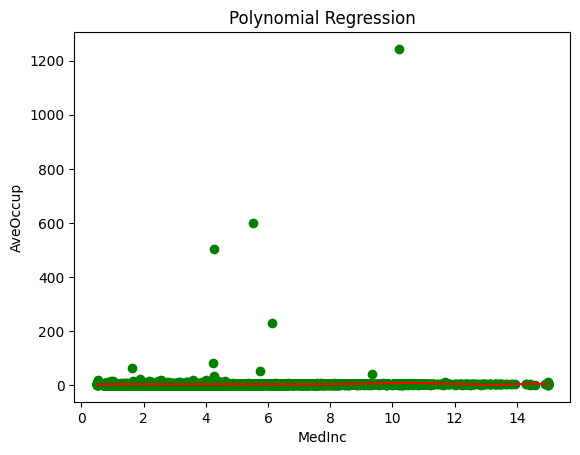

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Redefine x and y
x = df['MedInc'].values.reshape(-1, 1)
y = df['AveOccup'].values.reshape(-1, 1)

poly_reg = PolynomialFeatures(degree=9)
x_poly = poly_reg.fit_transform(x)

linear_model2 = LinearRegression()
linear_model2.fit(x_poly, y)

plt.scatter(x, y, color = 'green')
plt.plot(np.sort(x, axis=0), linear_model2.predict(np.sort(x_poly, axis=0)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('MedInc')
plt.ylabel('AveOccup')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
# Redefine x and y
x = df['MedInc'].values.reshape(-1, 1)
y = df['AveOccup'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train,y_train)
print(x_test,y_test)

[[3.2596]
 [3.8125]
 [4.1563]
 ...
 [2.9344]
 [5.7192]
 [2.5755]] [[3.6918138 ]
 [1.73809524]
 [2.72321429]
 ...
 [3.33206831]
 [3.17889088]
 [2.10869565]]
[[1.6812]
 [2.5313]
 [3.4801]
 ...
 [9.2298]
 [2.785 ]
 [3.5521]] [[3.87743733]
 [2.67979452]
 [1.36033229]
 ...
 [2.79049296]
 [2.58860759]
 [3.72991071]]


In [13]:
from sklearn.model_selection import train_test_split
# Redefine x and y
x = df['MedInc'].values.reshape(-1, 1)
y = df['AveOccup'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)
print(x_train,y_train)
print(x_test,y_test)

[[2.25  ]
 [3.4784]
 [4.207 ]
 ...
 [3.1106]
 [4.0074]
 [2.0754]] [[3.14285714]
 [2.12199037]
 [2.41374838]
 ...
 [2.46953125]
 [2.52054795]
 [4.12857143]]
[[2.4931]
 [2.8649]
 [2.0323]
 ...
 [4.0417]
 [1.9028]
 [2.625 ]] [[4.09171598]
 [2.26816609]
 [3.430131  ]
 ...
 [2.8       ]
 [3.65598291]
 [3.21084337]]


In [18]:
 df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(y_test, y_poly_pred, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression Prediction vs Actual")
plt.grid(True)
plt.show()

NameError: name 'y_poly_pred' is not defined

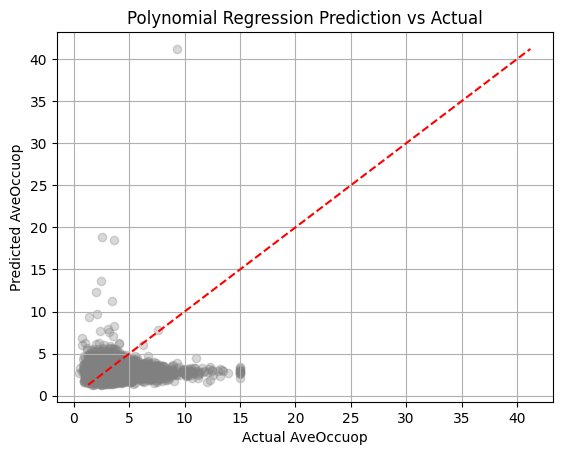

In [25]:
plt.scatter(x_test,y_test, alpha=0.3, color='gray')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AveOccuop")
plt.ylabel("Predicted AveOccuop")
plt.title("Polynomial Regression Prediction vs Actual")
plt.grid(True)
plt.show()

In [28]:
np.random.seed(42)
n_samples = 1000
X = np.sort(2 * np.pi * np.random.rand(n_samples, 1), axis=0)
y = np.sin(x).ravel() + np.random.normal(0, 0.2, x.shape[0])

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# 3. Define polynomial degrees to test
degrees = [1, 5, 10, 16]

# 4. Plot predictions
plt.figure(figsize=(10, 6))
plt.show()


<Figure size 1000x600 with 0 Axes>

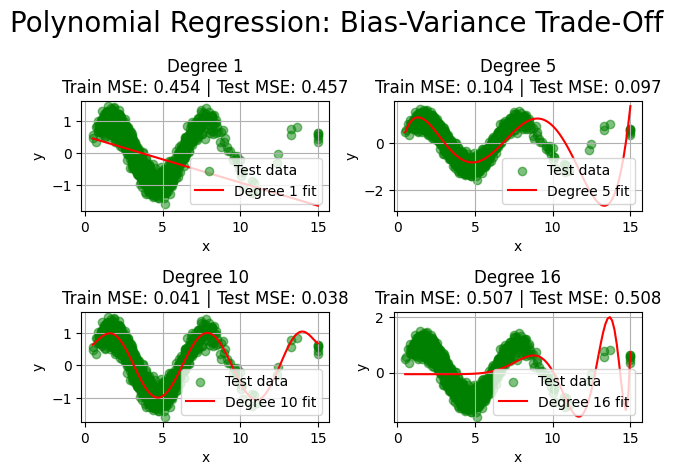

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i + 1)

    # Build polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)

    # Predict on a smooth curve for visualization
    x_plot = np.linspace(x_test.min(), x_test.max(), 100).reshape(-1, 1)
    y_plot = model.predict(x_plot)



    # Predictions on train and test for error calculation
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Plot
    #plt.scatter(x_train, y_train, color='blue', label='Train data', s=20, alpha=0.5)
    plt.scatter(x_test, y_test, color='green', label='Test data', alpha=0.5)
    #plt.plot(x_plot, np.sin(x_plot), 'k--', label='True function') # This is plotting sine wave, not the actual data relationship
    plt.plot(x_plot, y_plot, color='red', label=f'Degree {degree} fit')

    plt.title(f"Degree {degree}\nTrain MSE: {train_mse:.3f} | Test MSE: {test_mse:.3f}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

plt.suptitle("Polynomial Regression: Bias-Variance Trade-Off", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()